# Michaelis-Menten-Kinetics computation
This working example consists of spectrometric data for Michael-Menten kinetics, i.e. time series of absorption at a given wavelength. Measurements are conducted at defined concentrations and saved to single CSV-like files ("comma separated values"). The goal is to automatically extract the maximum reaction velocity of every measurement by a linear fit and to plot those as a function of the concentration. You should learn 

1) how to import this data. It's real word data, so loading it can be a little unpleasant. 

2) to plot the data with matplotlib.

3) to do a linear fit and save the results.

Please go through the notebook, check what is done and complete the fields denoted by `#FIXME`.

## 0. Importing libraries
As a first step, we import software packages that we need for our work. This will mainly be `numpy` for numerical computations, `matplotlib` for plotting and `csv` for data input. Please note the short notation of the modules given by `as`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

## 1. data I/O
#### Let's check the content and how it can be loaded!
Files are stored in the data subfolder. Let's check an example file before extracting actual values. The below lines open the file and read the content with the `csv` python package.

##### Note:
If you are completely new to programming, the following code might be a bit too complicated. In that case, take a look and skip to the next Cheating-point. 

In [2]:
file_name = 'data/26.txt'  # input file name (potentially write full path)
with open(file_name, 'r') as file:  # open the file
    reader = csv.reader(file, delimiter=' ')  # read the opened file with a csv reader.
    for n, line in enumerate(reader):  # iterate over all rows
        print('line #{}:'.format(n), line)

line #0: ['TEST-EINR']
line #1: ['BioMate', '3S', 'v4.000I', '2K6N070003']
line #2: []
line #3: ['Kinetik', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0:44', '13Aug13']
line #4: ['Testbez.', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '------']
line #5: ['Messmodus', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Absorption']
line #6: ['Wellenlnge', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '436.0nm']
line #7: ['Ref.-Wellenlg.korrektur', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Aus']
line #8: ['Delay-Zeit', '(min:sec)', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '0:00']
line #9: ['Intervallzeit', '(min:sek)', '', '', '', '', '', '', '', '', '', '', '', '', '0:01']
line #10: ['Gesamtlaufzeit(hr:min:sec)', '', '', '', '', '', '', '0:30:00']
line #11: ['Zeige', 'Ergebnis', '', '', '', '', '', 

We note that 
- the first and last lines don't contain data
- the lines, encoded in the variable `line`, are actually lists.
- the lines contain some empty fields
- the elements are written in parenthesis, which means they are not stored as numbers but as strings i.e. text format
- time format is not in seconds

#### Let's create usable data from the content

To only get our data, we thus have to
- exclude the first lines by defining a range of lines we want to read
- save only the interesting elements of each line by putting column indices to the list, i.e. `line[0]` for the first element
- convert the string (text format) number into a real number a.k.a. float by `float(string_number)`
- convert the time format in seconds by defining the below function

In [2]:
def convert_time(hours_minutes_seconds_timestring):
    n_hours = hours_minutes_seconds_timestring[0]
    n_minutes = hours_minutes_seconds_timestring[2:4]
    n_seconds = hours_minutes_seconds_timestring[5:]
    return 60 * 60 * float(n_hours) + 60. * float(n_minutes) + float(n_seconds)
print('This function converts {} to {} seconds.'.format('0:09:54', convert_time('0:09:54')))

This function converts 0:09:54 to 594.0 seconds.


In [4]:
first_line, last_line = 23, 82  # FIXME
time = []  # create empty lists for the columns
values = []
with open(file_name, 'r') as file:  # open the file
    reader = csv.reader(file, delimiter=' ')  # read the opened file with a csv reader.

    for n, line in enumerate(reader):  # iterate over all rows
        if n >= first_line and n <= last_line:
            time.append(convert_time(line[1]))  # append converted time to list
            values.append(float(line[4]))  # append number representation of measurement value to list
# FIXME: time index

###### Cheating point (for beginners only!)
Load the pre-processed data directly by uncommenting and executing the following line. 

In [3]:
#time, values = np.loadtxt('data/task1.txt')

## 2. Simple plotting

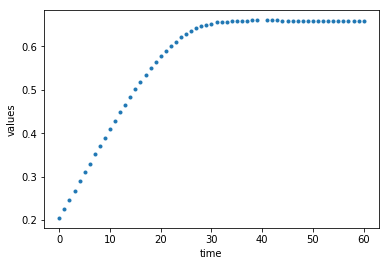

In [4]:
plt.plot(time, values, '.')  # '.' is the plotting marker, i.e. dots  # FIXME
plt.xlabel('time')
plt.ylabel('values');

## 3. Linear regression
We can use already existing functions to do the linear regression (actually, most things you might need have already been implemented by someone... google is your friend). We use scipy, a scientific library, to achieve that.

In [5]:
from scipy import stats

Have a look into the manual for more details about `linregress`: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html
##### IMPORTANT:
Since the data is not linear and we only need to extract the starting velocity $V_0$, we have to restrict the fit to the first data points in the sample. We do this a colon in the list notation, e.g. `some_list[start:stop]`.

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(time[:15], values[:15])

#### print output of linregress

In [7]:
print('slope: ', np.round(slope, 4))
print('intercept: ', np.round(intercept, 4))
print('correlation coeff: ', np.round(r_value, 4))
print('standard deviation: ', np.round(std_err, 4))

slope:  0.02
intercept:  0.2081
correlation coeff:  0.9997
standard deviation:  0.0001


#### plot the result
To plot a function, we have to create arrays of data points from that function first. Just providing the functional form is not enough. Below, you find a simple definition of a function as an example.

In [8]:
def linear_function(x, m, a):
    return m * x + a

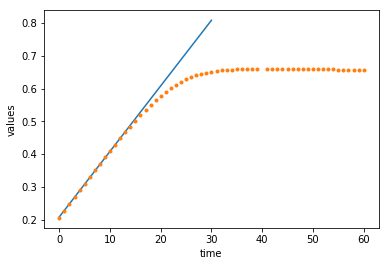

In [9]:
x = np.linspace(0, 30, 100)  # x axis data points
y = linear_function(x, slope, intercept)

plt.plot(x, y)  # plot fit function

# copy pasted first plot:
plt.plot(time, values, '.')
plt.xlabel('time')
plt.ylabel('values');

## 4. Remarks:
One non-obvious point at this point is that for the sake of simplicity, we have not spoken about data types. In this example, we used python lists and numpy arrays interchangeably. However, there are several very important differences that you should know about. 

##### Python list: `some_list = [1, 2, 3, 4]`
- good: can be defined without knowing how large it will be, i.e. values are simply appended by `some_list.append(some_value)`
- bad: one cannot do math operations on them, i.e. `some_list * another_list` does not work

##### numpy arrays: `some_nparray = np.array([1, 2, 3, 4])`
- good: can do math operations on them, i.e. elementwise multiplication `some_nparray * some_nparray` works.
- good: higher dimensions, e.g. matrices, are possible and easy to handle
- bad: appending values is not part of the idea
- functions from numpy or scipy naturally return numpy arrays by default.

##### recommendation:
- use numpy arrays whenever possible. They can be initialized i.g. by `np.zeros(length)`.
- if you don't know how, use a list and convert it into a numpy array by `np.array(some_list)`.
- google is your friend

## 5. DIY
You might have noticed that this was only one file in a series of enzyme kinetics measurements. Load the other files and process them in a for loop in order to extract the starting velocities from each file. The list of volume concentrations (ordered as the input files) is given by (arbitrary units)
```python
vol_s = np.array([1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,7,7,7,9,9,9,11,11,11,13,13,13,15,15,15, \
                  17,17,17,19,19,19,21,21,21,23,23,23,25,25,25,30,30,30])
```
After you have obtained the velocities, first check if the fits are okay. Then plot them as a function of the volume concentrations.
#### Tips
- file names are e.g. `data/0.txt`, ranging from 0 to 47 (which is contained in `range(48)`)
- You might encounter the problem that lists have different lengths. Python can handle this for you by trying out your commands.  In this case, you want to know if you cause an `IndexError` when trying to load an empty line at the end of the file. In this case, you want to stop loading the file, i.e.
```python
try:
    time.append(convert_time(line[1]))
    values.append(float(line[4]))
except IndexError:
    break  #  break iteration over lines here
```
- with the given data set, it might be enough to use the first 5 data points for the linear fit of the maximum velocity...
- again, if this is completely non-understandable to you, use the next Cheating point for loading the data.

In [14]:
first_line = 23  # known from example above

max_v = []
intercepts = []
time_all = []
values_all = []

for file_n in range(48):
    file_name = 'data/{}.txt'.format(file_n)  # input file name (potentially write full path)
    time = []  # create empty lists for the columns
    values = []
    with open(file_name, 'r') as file:  # open the file
        reader = csv.reader(file, delimiter=' ')  # read the opened file with a csv reader.

        for n, line in enumerate(reader):  # iterate over all rows
            if n >= first_line:
                try:
                    time.append(convert_time(line[1]))  # append converted time to list
                    values.append(float(line[4]))  # append number representation of measurement value to list
                except IndexError:
                    break
    time_all.append(time)
    values_all.append(values)
    #plt.plot(time, values, '.')
    slope, intercept, r_value, p_value, std_err = stats.linregress(time[:5], values[:5])
    max_v.append(slope)
    intercepts.append(intercept)

##### Cheating-point
You can load the pre-processed data for task 2 by uncommenting and executing the following cell.

In [12]:
for file_n in range(48):
    time, values = np.loadtxt('data/task2_{}.txt'.format(file_n))

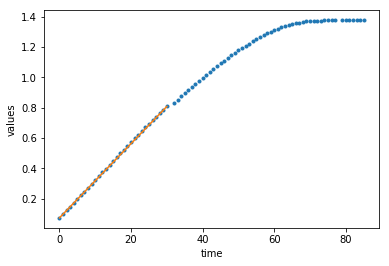

In [17]:
dataset_n = 47
plt.plot(time_all[dataset_n], values_all[dataset_n], '.')
x = np.linspace(0, 30, 100)  # x axis data points
y = linear_function(x, max_v[dataset_n], intercepts[dataset_n])
plt.plot(x, y)  # plot fit function
plt.xlabel('time')
plt.ylabel('values');

Text(0,0.5,'vmax')

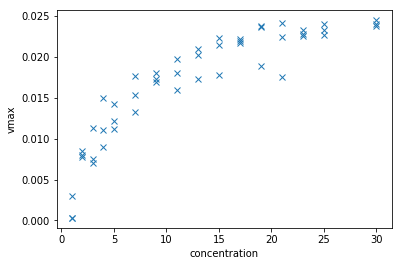

In [18]:
vol_s = np.array([1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,7,7,7,9,9,9,11,11,11,13,13,13,15,15,15,17,17,17,19,19,19, \
      21,21,21,23,23,23,25,25,25,30,30,30])
plt.plot(vol_s, max_v, 'x')
plt.xlabel('concentration')
plt.ylabel('vmax')